In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np

In [2]:
#Read the Dataset
df_train = pd.read_csv('Dataset_train_padel_edited.csv', sep=',')
df_test = pd.read_csv('Dataset_test_padel_edited.csv', sep=',')

In [3]:
df_train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,0.2233,0.049863,70.0534,76.025376,12,13,66,34,32,...,71.201670,2.094167,18.726043,12.038283,6.687760,3392.0,73.0,9.561,198.0,0.0
1,1,-0.2439,0.059487,14.3849,35.047516,12,12,29,17,12,...,34.154841,2.009108,7.396095,7.396095,0.000000,530.0,24.0,5.852,84.0,0.0
2,0,-0.6813,0.464170,42.7040,62.218688,18,18,49,33,16,...,67.163315,2.035252,33.832420,12.421201,15.403882,3502.0,53.0,5.992,176.0,1.0
3,2,0.2023,0.040925,44.9687,71.669860,23,24,56,36,20,...,72.666696,2.018519,36.153491,12.057732,9.505728,4274.0,60.0,5.230,194.0,1.0
4,1,2.0771,4.314344,159.7139,117.142373,6,6,107,46,61,...,93.603246,2.034853,12.958770,9.916845,3.041925,7511.0,100.0,13.527,270.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,0,-0.4369,0.190882,49.6836,30.143102,0,0,28,14,14,...,28.014526,2.001038,10.593134,10.593134,0.000000,266.0,23.0,-1.060,74.0,1.0
2617,1,-8.6979,75.653464,122.6846,113.445994,9,10,106,48,58,...,94.996453,1.979093,32.060122,14.860270,17.199852,10085.0,65.0,6.591,222.0,0.0
2618,0,-0.0984,0.009683,59.6578,74.620274,21,22,59,41,18,...,83.091605,2.026625,44.040188,12.459157,12.378858,5790.0,69.0,5.298,230.0,1.0
2619,2,0.8957,0.802278,31.3194,88.960204,33,35,71,43,28,...,88.708828,2.062996,25.012148,7.035760,9.898856,6245.0,77.0,13.130,238.0,1.0


In [4]:
df_test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,active
0,0,-0.8246,0.679965,30.8082,58.953446,19,22,49,27,22,...,56.905772,2.107621,12.852939,6.286213,6.566726,2162.0,40.0,5.853,148.0,1.0
1,0,-0.1388,0.019265,26.5318,60.611446,21,24,48,26,22,...,53.950565,2.075022,5.706052,2.524466,0.000000,1746.0,41.0,9.201,138.0,1.0
2,2,-0.9673,0.935669,191.7513,127.715131,0,0,120,53,67,...,107.184976,2.022358,29.004188,25.990040,3.014148,11700.0,116.0,8.505,304.0,1.0
3,0,-0.5162,0.266462,86.4240,114.598134,30,30,93,55,38,...,111.591161,2.028930,39.705534,27.344229,3.088891,16116.0,80.0,8.885,280.0,1.0
4,0,1.7350,3.010225,81.9806,69.672962,9,10,62,28,34,...,58.031889,2.072567,9.271157,2.567150,6.704006,1770.0,56.0,7.591,166.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2,-1.4182,2.011291,44.6940,58.103067,15,17,49,30,19,...,61.278840,2.042628,21.524865,18.382871,3.141994,2683.0,48.0,3.565,160.0,1.0
1120,1,-1.0189,1.038157,31.1932,64.971032,21,24,54,30,24,...,61.824667,2.060822,10.982047,10.982047,0.000000,2801.0,46.0,8.771,156.0,1.0
1121,0,-8.5929,73.837930,140.1859,115.544338,0,0,111,45,66,...,90.004484,2.000100,21.859161,21.859161,0.000000,11495.0,56.0,7.914,214.0,0.0
1122,2,-0.9440,0.891136,24.1688,55.960688,20,22,45,29,16,...,59.398386,2.048220,14.893385,14.893385,0.000000,2008.0,54.0,7.252,158.0,0.0


In [5]:
X_train = df_train.loc[:, ~df_train.columns.isin(['active'])]
X_test = df_test.loc[:, ~df_test.columns.isin(['active'])]

In [6]:
y_train = df_train['active']
y_test = df_test['active']

In [7]:
#Adaptive Boosting
clf = AdaBoostClassifier(random_state=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="macro")
recall = recall_score(y_test,y_pred, average="macro")
print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
activity = ['non-active', 'active']
print(classification_report(y_test, y_pred, target_names=activity))

Accuracy: 0.9110320284697508 ;
Precision: 0.9106189124737025 ;
Recall: 0.9101056961117222 ;

              precision    recall  f1-score   support

  non-active       0.91      0.90      0.90       515
      active       0.92      0.92      0.92       609

    accuracy                           0.91      1124
   macro avg       0.91      0.91      0.91      1124
weighted avg       0.91      0.91      0.91      1124



In [8]:
#Using Feature Importance
clf.feature_importances_

array([0.  , 0.06, 0.02, ..., 0.  , 0.  , 0.  ])

In [9]:
#Sorting
feature_importances = pd.DataFrame(clf.feature_importances_, index = df_train.columns[:-1], columns=['importance']).sort_values('importance', ascending=False)

In [10]:
#Sorted from the most important to less important features
feature_importances

,importance
ALogP,0.06
AATS1p,0.02
MLFER_S,0.02
SpMax5_Bhp,0.02
ATSC2p,0.02
...,...
SpMin5_Bhm,0.00
SpMin4_Bhm,0.00
SpMin3_Bhm,0.00
SpMin2_Bhm,0.00


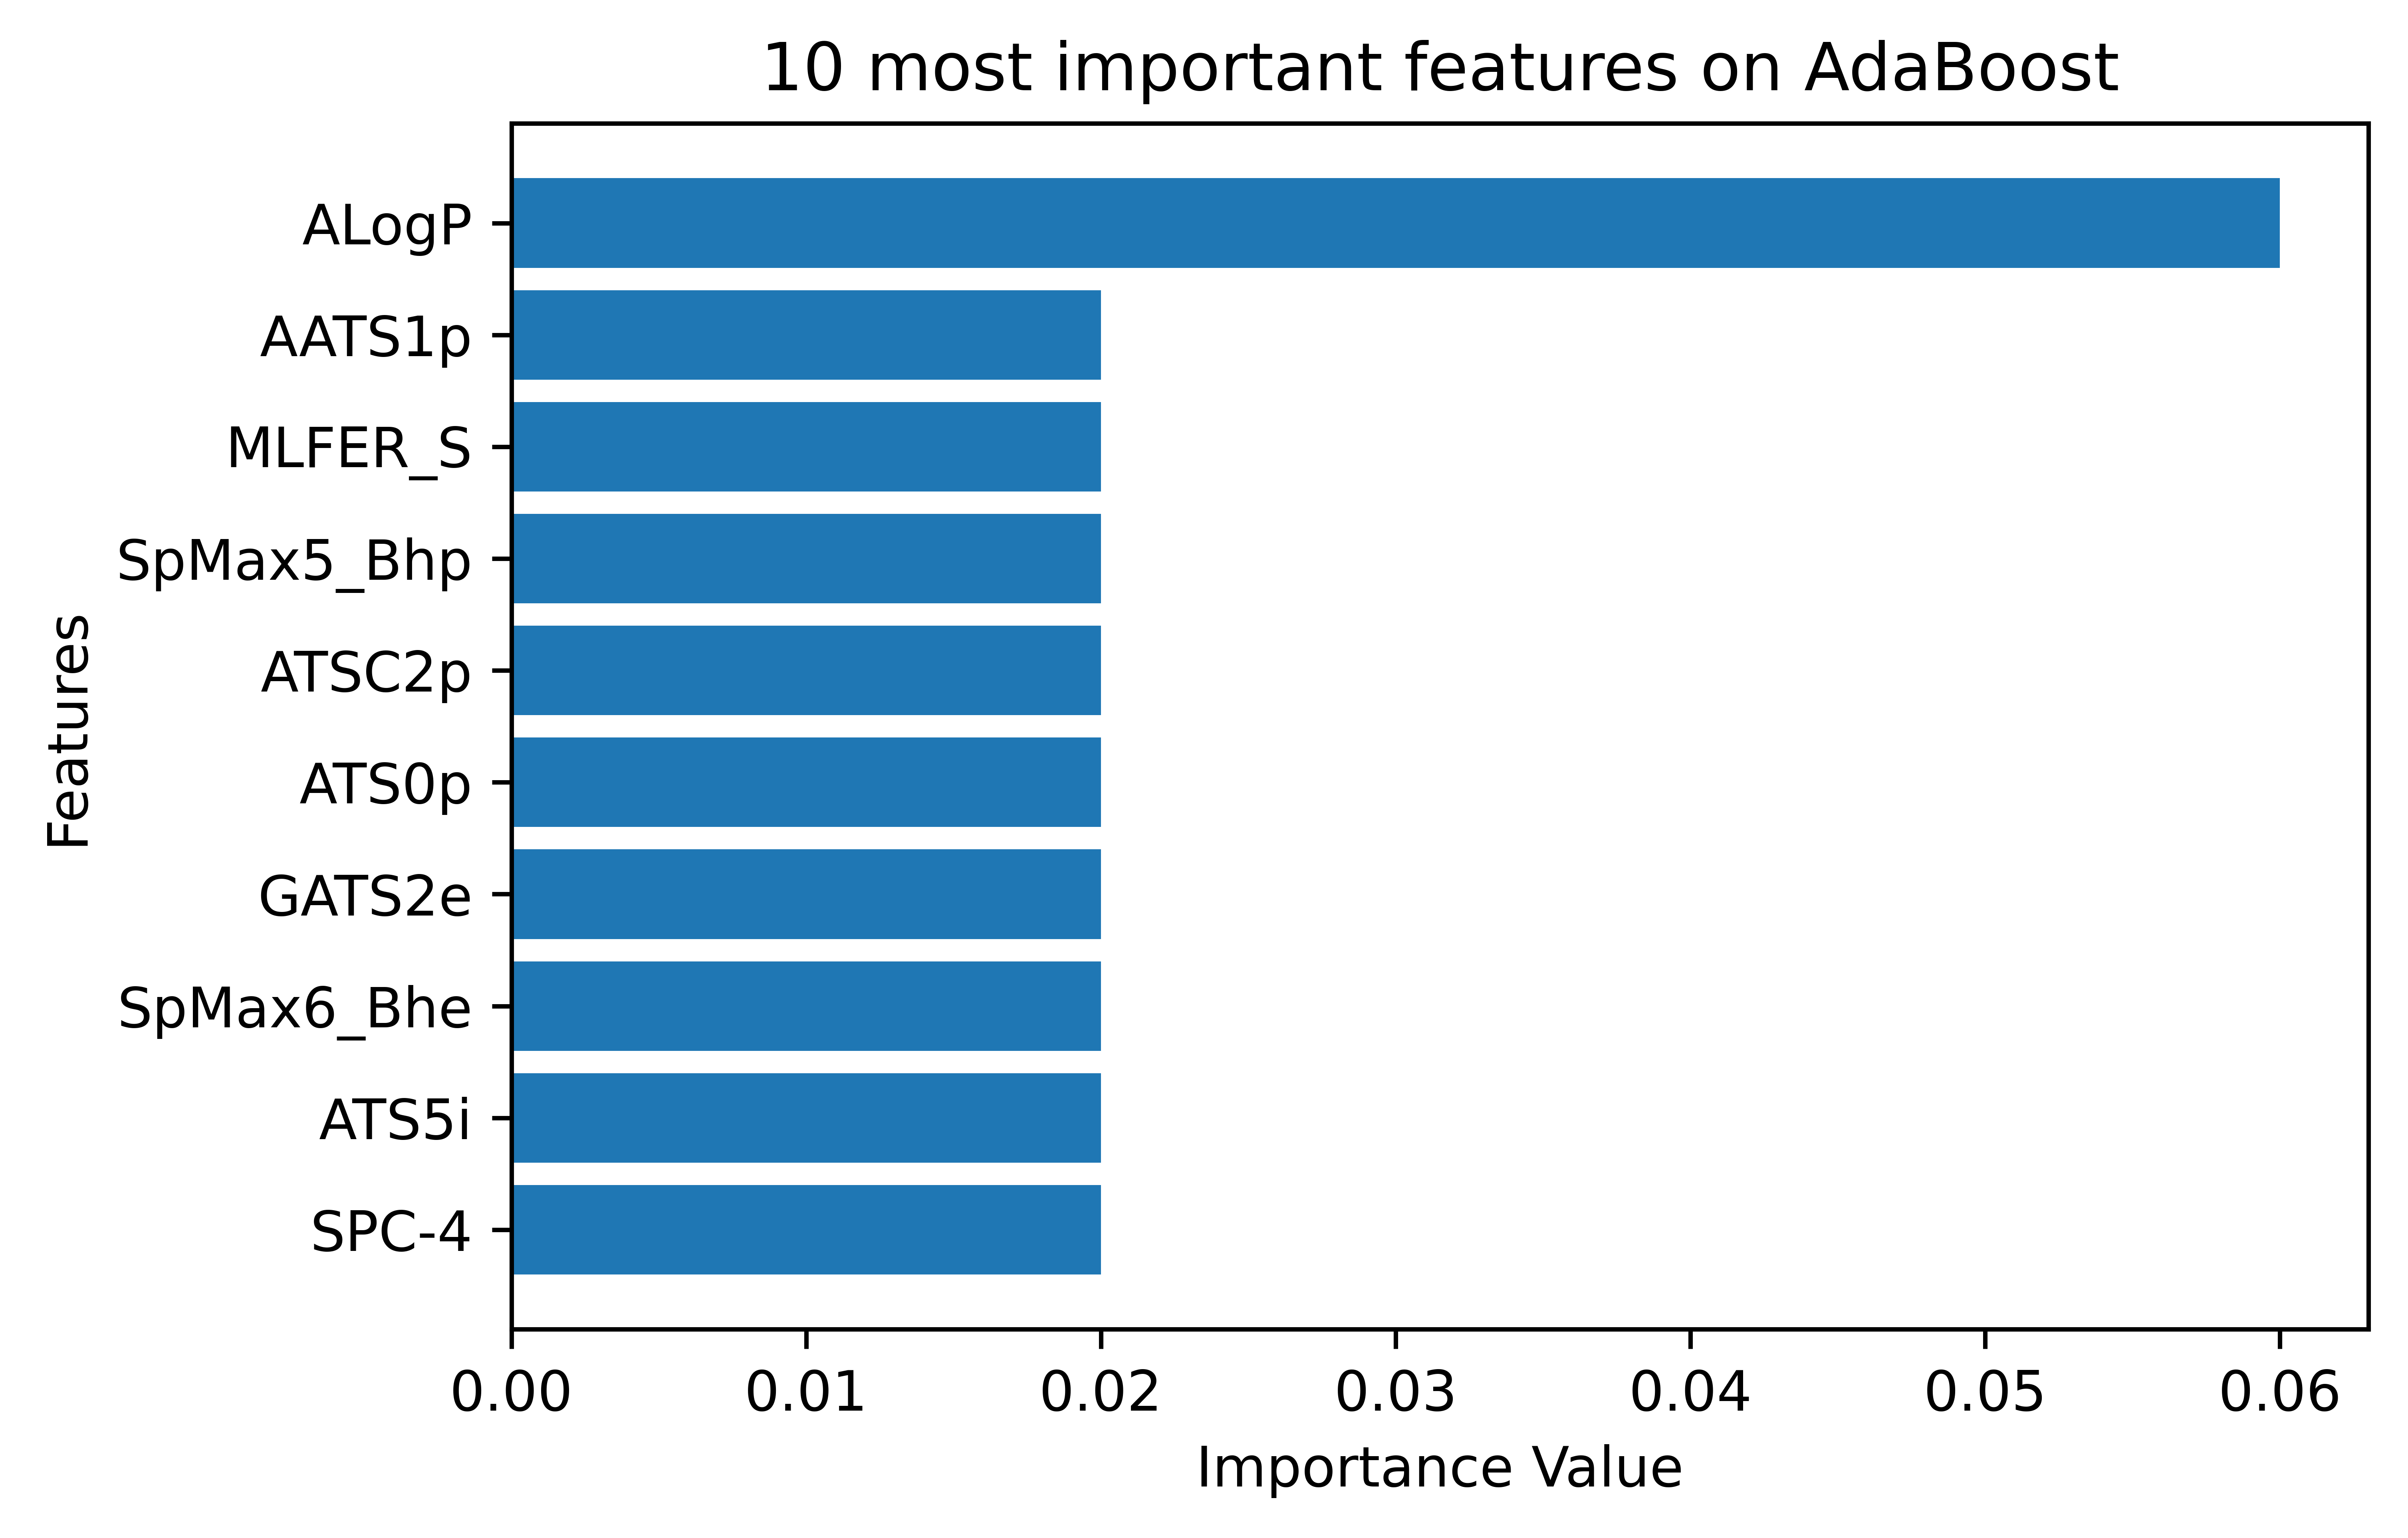

In [11]:
#Visualization
importance = clf.feature_importances_
top10 = feature_importances[:10]
Top10 = top10.index

sort = np.sort(clf.feature_importances_)
importance_values = sort[::-1]
top10values = importance_values[:10]

plt.barh(Top10, top10values)
plt.gca().invert_yaxis()
plt.title('10 most important features on AdaBoost')
plt.ylabel('Features')
plt.xlabel('Importance Value')
plt.gcf().set_dpi(1000)
plt.show()

In [12]:
df_t = feature_importances.T
df_t 

,ALogP,AATS1p,MLFER_S,SpMax5_Bhp,ATSC2p,ATS0p,GATS2e,SpMax6_Bhe,ATS5i,SPC-4,...,SpMin1_Bhm,SpMax2_Bhv,SpMin8_Bhm,SpMin7_Bhm,SpMin6_Bhm,SpMin5_Bhm,SpMin4_Bhm,SpMin3_Bhm,SpMin2_Bhm,Zagreb
importance,0.06,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Delete 0 importance
for column in df_train:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_train = df_train.drop(column , 1)

for column in df_test:
  if column!= "active":
    if float(df_t[column]) == 0.0: 
      df_test = df_test.drop(column , 1)

for column in df_t :
  if float(df_t[column] == 0.0):
    df_t = df_t.drop(column , 1)

C:\Users\garud\AppData\Local\Temp/ipykernel_20516/2004814466.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_train = df_train.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_20516/2004814466.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop(column , 1)
C:\Users\garud\AppData\Local\Temp/ipykernel_20516/2004814466.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_t = df_t.drop(column , 1)


In [14]:
len(df_t.columns)

48

In [15]:
len(df_train.columns)

49

In [16]:
len(df_test.columns)

49

In [17]:
#Sort df_train and df_test based on Feature Importance
df_train_final = pd.concat([df_t, df_train], axis=0)
df_test_final = pd.concat([df_t, df_test], axis=0)

In [18]:
df_train_final

,ALogP,AATS1p,MLFER_S,SpMax5_Bhp,ATSC2p,ATS0p,GATS2e,SpMax6_Bhe,ATS5i,SPC-4,...,MDEN-22,SpMax4_Bhs,maxdssC,ZMIC2,SpMax2_Bhi,VE1_Dzv,minHBint2,maxaaCH,ALogp2,active
importance,0.0600,0.020000,0.020,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,NaN
0,0.2233,1.839048,2.268,3.375489,-0.892415,97.309629,0.762354,3.257599,38975.039427,7.687947,...,0.000000,3.816161,0.000000,43.249482,4.001016,0.166781,0.000000,2.092540,0.049863,0.0
1,-0.2439,1.935217,1.290,2.665925,-1.044463,46.309567,0.416528,2.771820,9198.529074,2.414047,...,0.000000,3.635270,0.000000,31.776226,3.809230,0.037773,7.495887,1.937381,0.059487,0.0
2,-0.6813,2.055853,3.605,3.152933,-0.837807,88.109126,0.534629,3.285163,16795.348428,6.196559,...,1.577808,3.839110,0.000000,40.563373,3.931565,0.066445,4.443854,1.981153,0.464170,1.0
3,0.2023,2.192422,4.411,3.599722,-4.764443,110.500376,0.571012,3.535049,22080.514893,9.560478,...,1.000000,4.355030,0.000000,52.834543,3.982510,0.083310,5.068531,2.098292,0.040925,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,-0.4369,1.690268,2.022,2.480648,1.371911,36.686397,0.780110,2.492192,12901.346918,2.802803,...,0.000000,3.771524,1.091157,19.722594,3.484929,0.159096,0.000000,0.000000,0.190882,1.0
2617,-8.6979,1.676691,4.712,3.469576,-7.106769,137.307172,0.465945,3.584350,49118.073385,5.688427,...,1.119035,5.013835,0.000000,64.517584,3.843457,0.292225,3.436501,1.884998,75.653464,0.0
2618,-0.0984,2.128541,4.596,3.592350,0.278610,108.594948,0.446188,3.427807,24855.769738,9.432967,...,1.192794,4.980525,0.000000,46.031060,4.024247,0.005939,4.393854,1.885378,0.009683,1.0
2619,0.8957,2.076293,4.283,3.714007,-7.648400,126.628771,0.534152,3.617431,34025.566011,10.013522,...,1.000000,4.121209,0.000000,70.552542,4.019225,0.154007,4.795170,2.090219,0.802278,1.0


In [19]:
df_test_final

,ALogP,AATS1p,MLFER_S,SpMax5_Bhp,ATSC2p,ATS0p,GATS2e,SpMax6_Bhe,ATS5i,SPC-4,...,MDEN-22,SpMax4_Bhs,maxdssC,ZMIC2,SpMax2_Bhi,VE1_Dzv,minHBint2,maxaaCH,ALogp2,active
importance,0.0600,0.020000,0.020,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.02,0.020000,0.020000,0.020000,0.020000,2.000000e-02,0.020000,0.020000,0.020000,NaN
0,-0.8246,1.894267,2.422,3.148231,-0.540397,77.632592,1.172777,3.162549,16715.346656,3.552791,...,0.00,3.581902,0.000000,39.389013,3.911686,6.313238e-01,0.000000,2.094650,0.679965,1.0
1,-0.1388,2.106979,1.977,3.239956,1.476009,85.768288,0.590943,3.024251,16830.473421,3.516685,...,0.00,3.530690,0.000000,44.314914,3.974188,1.105062e-01,0.000000,2.357639,0.019265,1.0
2,-0.9673,1.710330,2.989,3.517967,6.735208,154.564905,0.619932,3.530611,96891.004695,16.329318,...,0.00,4.666495,1.502201,54.029757,3.941405,8.133454e-02,1.689594,0.000000,0.935669,1.0
3,-0.5162,1.997022,4.822,3.756453,-0.484499,160.454630,0.836035,3.797336,33363.292144,7.572554,...,0.00,3.920002,0.000000,67.193128,3.933999,5.060850e-02,5.645308,2.040247,0.266462,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-1.4182,1.876508,2.789,3.114808,-1.534099,75.515873,0.599905,3.084511,16508.179368,5.194216,...,0.00,4.228136,0.131464,38.939176,3.875582,3.405014e-01,7.750277,1.837966,2.011291,1.0
1120,-1.0189,1.920748,2.154,3.239267,-0.915414,85.754926,0.761812,3.294876,19750.626368,3.830125,...,0.00,3.730903,0.000000,45.349879,3.982582,5.201444e-01,7.767176,2.135825,1.038157,1.0
1121,-8.5929,1.648778,2.842,3.521402,-9.359797,137.679384,0.913188,3.566227,53312.932055,5.014585,...,0.00,4.593786,0.834078,83.535914,3.843890,4.839147e-02,0.000000,0.000000,73.837930,0.0
1122,-0.9440,2.001022,2.285,3.183502,0.336510,75.117730,0.409781,3.079362,19336.816587,5.695106,...,0.00,4.150799,0.000000,50.006271,4.026901,7.771561e-16,6.856275,1.761260,0.891136,0.0


In [20]:
#Remove the [importance] row
df_train = df_train_final.iloc[1:]
df_test = df_test_final.iloc[1:]

In [21]:
df_train

,ALogP,AATS1p,MLFER_S,SpMax5_Bhp,ATSC2p,ATS0p,GATS2e,SpMax6_Bhe,ATS5i,SPC-4,...,MDEN-22,SpMax4_Bhs,maxdssC,ZMIC2,SpMax2_Bhi,VE1_Dzv,minHBint2,maxaaCH,ALogp2,active
0,0.2233,1.839048,2.268,3.375489,-0.892415,97.309629,0.762354,3.257599,38975.039427,7.687947,...,0.000000,3.816161,0.000000,43.249482,4.001016,0.166781,0.000000,2.092540,0.049863,0.0
1,-0.2439,1.935217,1.290,2.665925,-1.044463,46.309567,0.416528,2.771820,9198.529074,2.414047,...,0.000000,3.635270,0.000000,31.776226,3.809230,0.037773,7.495887,1.937381,0.059487,0.0
2,-0.6813,2.055853,3.605,3.152933,-0.837807,88.109126,0.534629,3.285163,16795.348428,6.196559,...,1.577808,3.839110,0.000000,40.563373,3.931565,0.066445,4.443854,1.981153,0.464170,1.0
3,0.2023,2.192422,4.411,3.599722,-4.764443,110.500376,0.571012,3.535049,22080.514893,9.560478,...,1.000000,4.355030,0.000000,52.834543,3.982510,0.083310,5.068531,2.098292,0.040925,1.0
4,2.0771,1.793932,2.131,3.461965,8.758097,145.249103,0.449491,3.480830,90320.128546,14.512106,...,0.000000,4.072449,1.615435,51.791772,3.938975,0.368763,2.971725,1.996732,4.314344,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,-0.4369,1.690268,2.022,2.480648,1.371911,36.686397,0.780110,2.492192,12901.346918,2.802803,...,0.000000,3.771524,1.091157,19.722594,3.484929,0.159096,0.000000,0.000000,0.190882,1.0
2617,-8.6979,1.676691,4.712,3.469576,-7.106769,137.307172,0.465945,3.584350,49118.073385,5.688427,...,1.119035,5.013835,0.000000,64.517584,3.843457,0.292225,3.436501,1.884998,75.653464,0.0
2618,-0.0984,2.128541,4.596,3.592350,0.278610,108.594948,0.446188,3.427807,24855.769738,9.432967,...,1.192794,4.980525,0.000000,46.031060,4.024247,0.005939,4.393854,1.885378,0.009683,1.0
2619,0.8957,2.076293,4.283,3.714007,-7.648400,126.628771,0.534152,3.617431,34025.566011,10.013522,...,1.000000,4.121209,0.000000,70.552542,4.019225,0.154007,4.795170,2.090219,0.802278,1.0


In [22]:
df_test

,ALogP,AATS1p,MLFER_S,SpMax5_Bhp,ATSC2p,ATS0p,GATS2e,SpMax6_Bhe,ATS5i,SPC-4,...,MDEN-22,SpMax4_Bhs,maxdssC,ZMIC2,SpMax2_Bhi,VE1_Dzv,minHBint2,maxaaCH,ALogp2,active
0,-0.8246,1.894267,2.422,3.148231,-0.540397,77.632592,1.172777,3.162549,16715.346656,3.552791,...,0.0,3.581902,0.000000,39.389013,3.911686,6.313238e-01,0.000000,2.094650,0.679965,1.0
1,-0.1388,2.106979,1.977,3.239956,1.476009,85.768288,0.590943,3.024251,16830.473421,3.516685,...,0.0,3.530690,0.000000,44.314914,3.974188,1.105062e-01,0.000000,2.357639,0.019265,1.0
2,-0.9673,1.710330,2.989,3.517967,6.735208,154.564905,0.619932,3.530611,96891.004695,16.329318,...,0.0,4.666495,1.502201,54.029757,3.941405,8.133454e-02,1.689594,0.000000,0.935669,1.0
3,-0.5162,1.997022,4.822,3.756453,-0.484499,160.454630,0.836035,3.797336,33363.292144,7.572554,...,0.0,3.920002,0.000000,67.193128,3.933999,5.060850e-02,5.645308,2.040247,0.266462,1.0
4,1.7350,1.822992,1.631,3.180620,3.682483,87.902543,0.657458,3.106438,43967.187519,7.704740,...,0.0,3.547393,1.604792,26.946622,3.983005,3.952510e-02,0.000000,2.032790,3.010225,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-1.4182,1.876508,2.789,3.114808,-1.534099,75.515873,0.599905,3.084511,16508.179368,5.194216,...,0.0,4.228136,0.131464,38.939176,3.875582,3.405014e-01,7.750277,1.837966,2.011291,1.0
1120,-1.0189,1.920748,2.154,3.239267,-0.915414,85.754926,0.761812,3.294876,19750.626368,3.830125,...,0.0,3.730903,0.000000,45.349879,3.982582,5.201444e-01,7.767176,2.135825,1.038157,1.0
1121,-8.5929,1.648778,2.842,3.521402,-9.359797,137.679384,0.913188,3.566227,53312.932055,5.014585,...,0.0,4.593786,0.834078,83.535914,3.843890,4.839147e-02,0.000000,0.000000,73.837930,0.0
1122,-0.9440,2.001022,2.285,3.183502,0.336510,75.117730,0.409781,3.079362,19336.816587,5.695106,...,0.0,4.150799,0.000000,50.006271,4.026901,7.771561e-16,6.856275,1.761260,0.891136,0.0


In [23]:
#Adaptive Boosting with every 10% of features
x = 10
best_accuracy = 0

feature_percentage = []
arr_accuracy = []

while x<=100:
    #Create array feature percentage for plotting
    feature_percentage.append(x)
    
    tenPercent = len(df_t.columns) * (x/100)
    feature = feature_importances[:round(tenPercent)] #Take specific amount of features

    feature_name = feature.index

    #Create new df_train
    new_df_train = df_train.loc[:,feature_name]
    new_df_train['active'] = df_train['active']

    #Create new df_test
    new_df_test = df_test.loc[:,feature_name]
    new_df_test['active'] = df_test['active']

    new_X_train = new_df_train.loc[:, ~new_df_train.columns.isin(['active'])]
    new_X_test = new_df_test.loc[:, ~new_df_test.columns.isin(['active'])]

    new_y_train = new_df_train['active']
    new_y_test = new_df_test['active']

    clf1 = AdaBoostClassifier(random_state=15)
    #clf1.fit(new_X_train, new_y_train)
    #y_pred = clf1.predict(new_X_test)
    
    print(x,"% of the dataset")
    print(len(new_df_train.columns),"features used\n")
    
    # prepare the cross-validation procedure
    score = cross_val_score(clf1, new_X_train, new_y_train, scoring='accuracy', cv = 10)
    accuracy = np.average(score)
    
    print("Accuracy: ", accuracy,"\n")
    
    #accuracy = accuracy_score(new_y_test,y_pred)
    #precision = precision_score(new_y_test,y_pred, average="macro")
    #recall = recall_score(new_y_test,y_pred, average="macro")
    
    #Create array accuracy for plotting
    arr_accuracy.append(accuracy)
    
    #print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
    #activity = ['non-active', 'active']
    #print(classification_report(new_y_test, y_pred, target_names=activity))
    print("======================================================\n")
    
    if best_accuracy < accuracy:
        best_new_X_train = new_X_train
        best_new_X_test = new_X_test
        best_new_y_train = new_y_train
        best_new_y_test = new_y_test
        
        bestPercentage = x
        bestSumOfDataset = len(new_df_train.columns)
        
        best_accuracy = accuracy
        #best_precision = precision
        #best_recall = recall
        
        #class_report = classification_report(new_y_test, y_pred, target_names=activity)
        
    x += 10

print("BEST OUTPUT")
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")
print("Accuracy: ", accuracy)
#print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(best_accuracy,best_precision,best_recall))
#print(class_report)

10 % of the dataset
6 features used

Accuracy:  0.8599802629669405 


20 % of the dataset
11 features used

Accuracy:  0.8870693408411461 


30 % of the dataset
15 features used

Accuracy:  0.8847879720198533 


40 % of the dataset
20 features used

Accuracy:  0.8939381185963485 


50 % of the dataset
25 features used

Accuracy:  0.9031013264447217 


60 % of the dataset
30 features used

Accuracy:  0.9057672771601892 


70 % of the dataset
35 features used

Accuracy:  0.9134023161988797 


80 % of the dataset
39 features used

Accuracy:  0.9091965866542827 


90 % of the dataset
44 features used

Accuracy:  0.9210300989754158 


100 % of the dataset
49 features used

Accuracy:  0.9210271964705541 


BEST OUTPUT
90 % of the dataset
44 features used

Accuracy:  0.9210271964705541


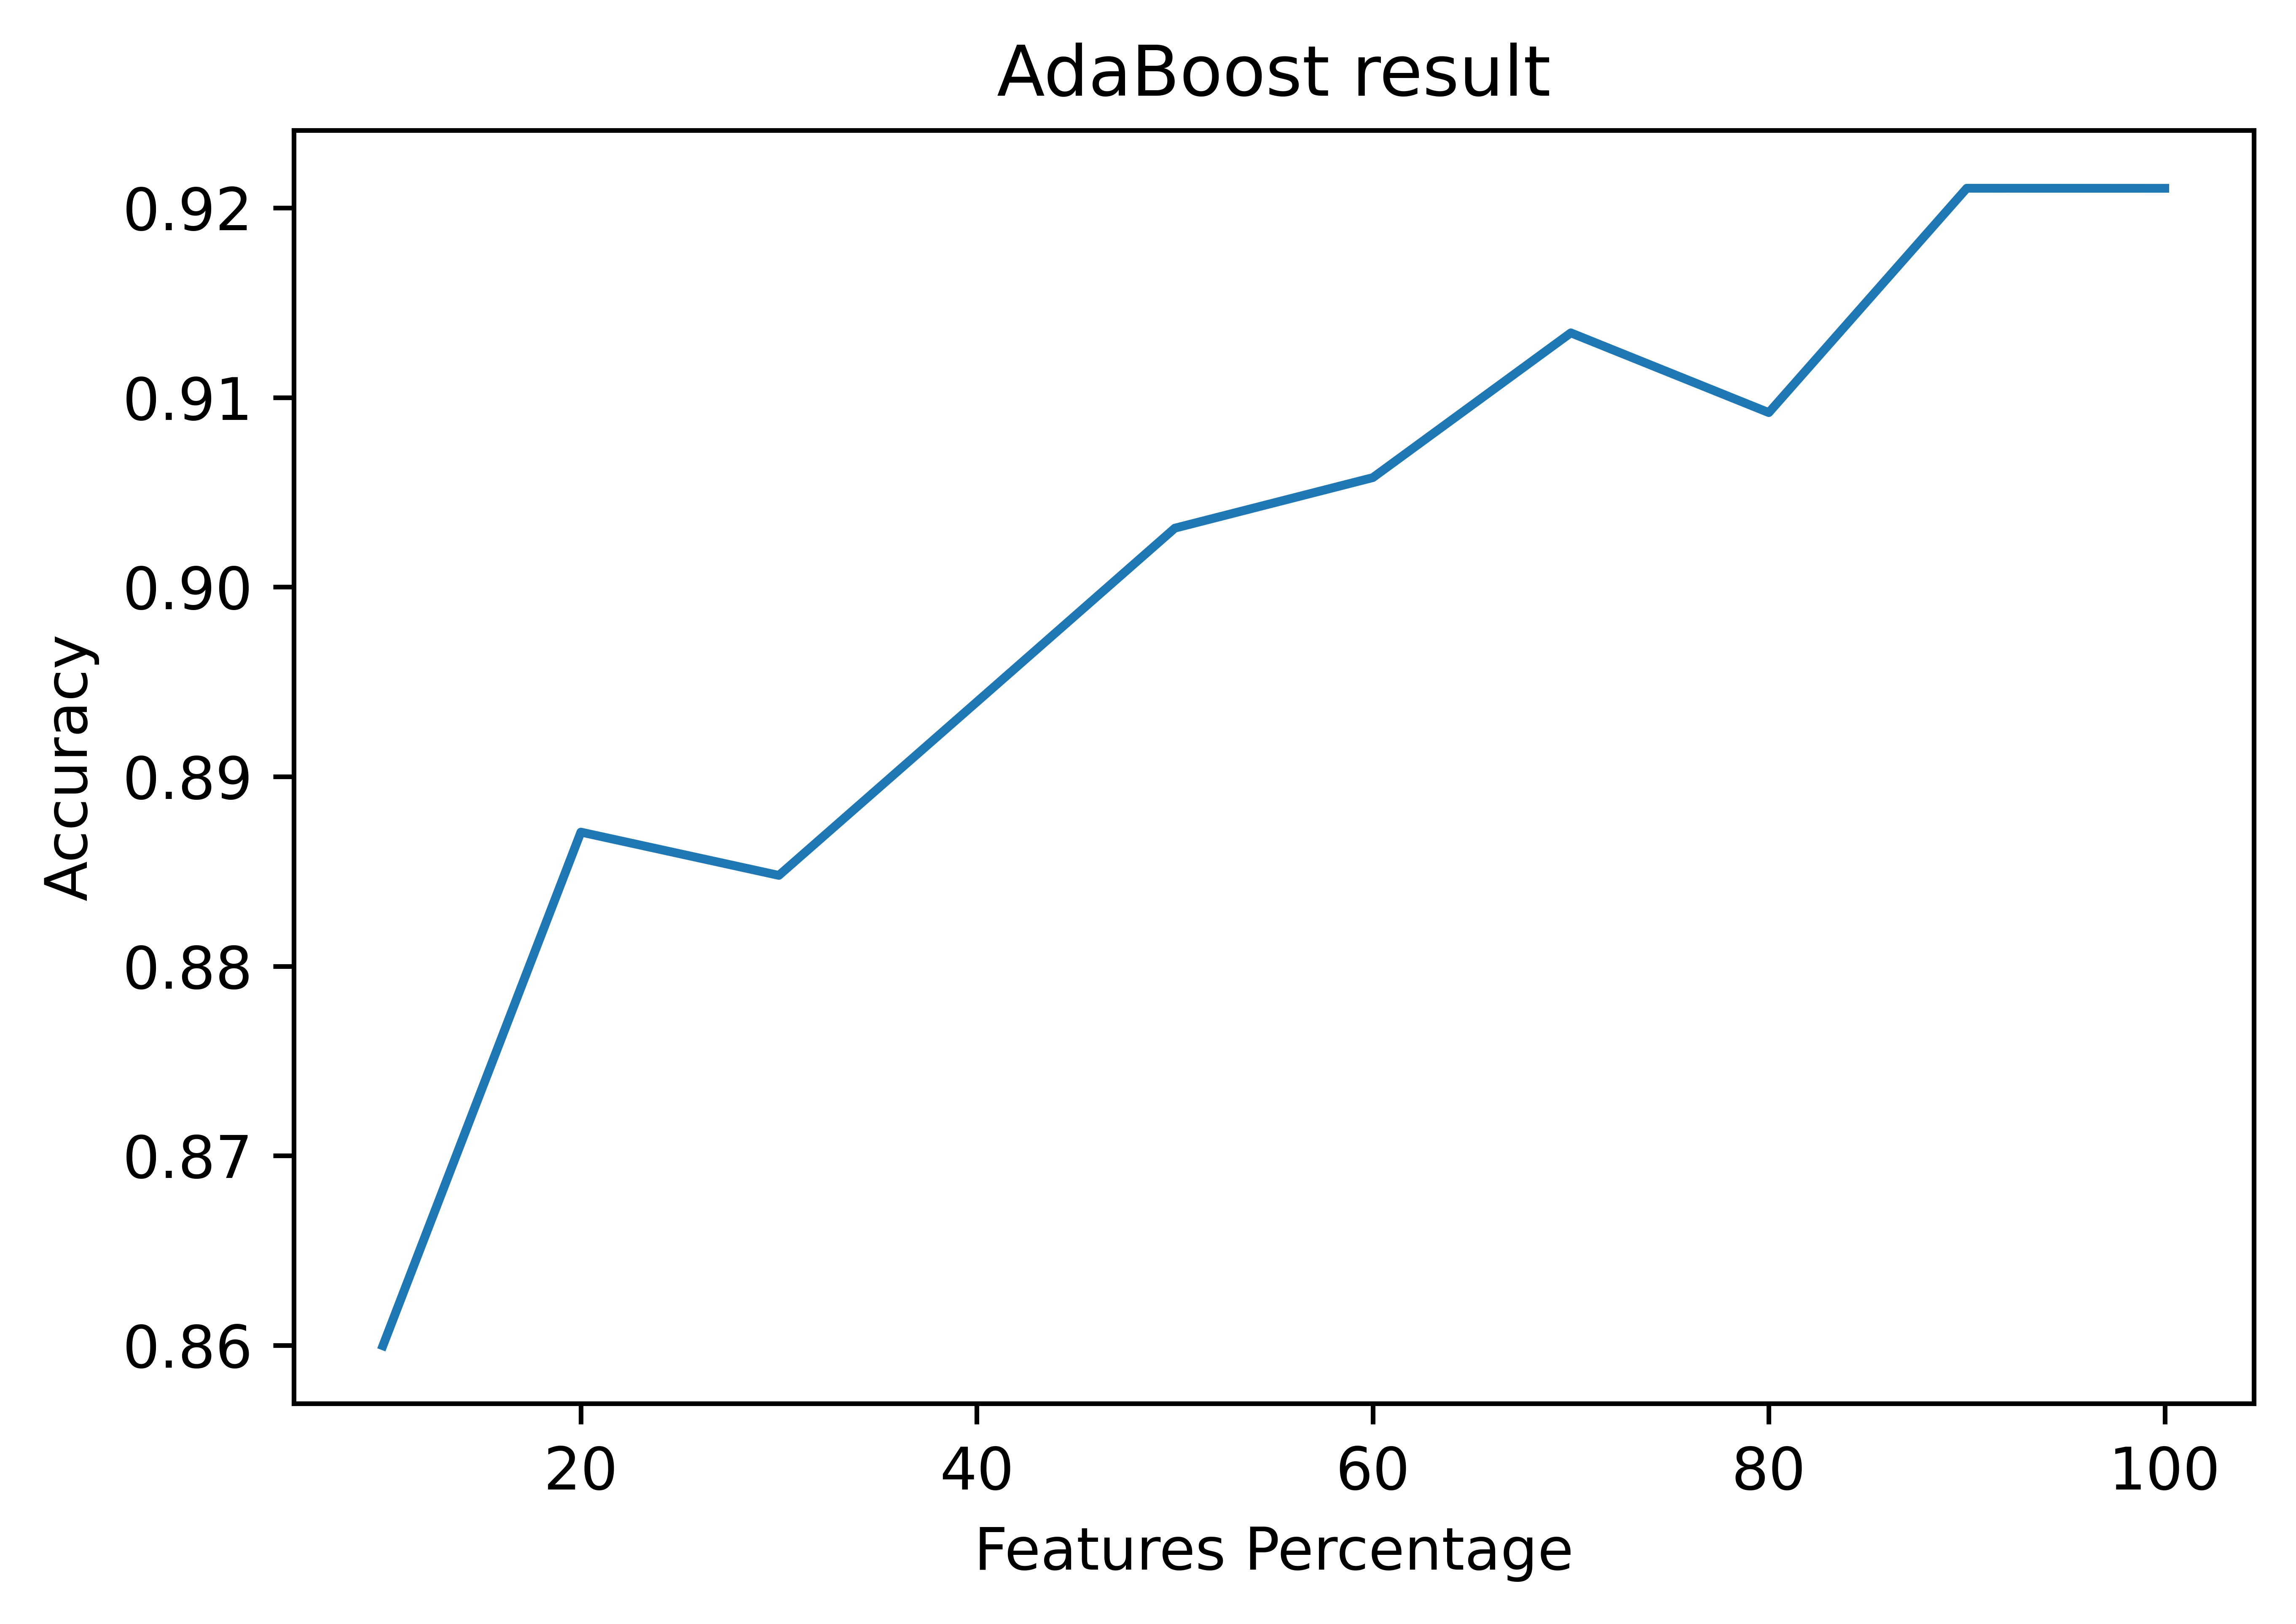

In [24]:
plt.figure()
plt.title('AdaBoost result')
plt.plot(feature_percentage, arr_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Features Percentage')
plt.gcf().set_dpi(1000)
plt.show()

# Grid Search CV

In [25]:
#Make a timer (optional)
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
   
# Fit the grid search to the data
from sklearn.model_selection import GridSearchCV

param_grid = {
             'n_estimators' : [10, 50, 100, 150, 200, 300, 400, 500],
             'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0],
             'random_state' : [15]
             }

grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 10, verbose = 3, scoring = 'accuracy')

start_time = timer(None)
grid.fit(best_new_X_train, best_new_y_train)
timer(start_time)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.806 total time=   0.0s
[CV 2/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.832 total time=   0.0s
[CV 3/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.794 total time=   0.0s
[CV 4/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.832 total time=   0.0s
[CV 5/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.782 total time=   0.0s
[CV 6/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.790 total time=   0.0s
[CV 7/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.790 total time=   0.0s
[CV 8/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.775 total time=   0.0s
[CV 9/10] END learning_rate=0.0001, n_estimators=10, random_state=15;, score=0.794 total time=   0.0s
[CV 10/10] END lear

In [26]:
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 15}

In [28]:
print(bestPercentage,"% of the dataset")
print(bestSumOfDataset,"features used\n")

clf2 = AdaBoostClassifier(learning_rate = 1, n_estimators = 100, random_state = 15)
clf2.fit(best_new_X_train, best_new_y_train)
y_predTrain = clf2.predict(best_new_X_train)

accuracy = accuracy_score(best_new_y_train,y_predTrain)
precision = precision_score(best_new_y_train,y_predTrain, average="macro")
recall = recall_score(best_new_y_train,y_predTrain, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_train, y_predTrain))
print('F1 Score:', f1_score(best_new_y_train, y_predTrain))
print("=======================================")

clf3 = clf2
clf3.fit(best_new_X_train, best_new_y_train)
y_predTest = clf3.predict(best_new_X_test)

accuracy = accuracy_score(best_new_y_test,y_predTest)
precision = precision_score(best_new_y_test,y_predTest, average="macro")
recall = recall_score(best_new_y_test,y_predTest, average="macro")

print('Accuracy: {} ;\nPrecision: {} ;\nRecall: {} ;\n'.format(accuracy,precision,recall))
print('Confusion Matrix:\n', confusion_matrix(best_new_y_test, y_predTest))
print('F1 Score:', f1_score(best_new_y_test, y_predTest))
print("=======================================")
activity = ['non-active', 'active']
print(classification_report(best_new_y_test, y_pred, target_names=activity))

90 % of the dataset
44 features used

Accuracy: 0.9637542922548645 ;
Precision: 0.9648273581597422 ;
Recall: 0.9625115186599364 ;

Confusion Matrix:
 [[1148   66]
 [  29 1378]]
F1 Score: 0.966678358470712
Accuracy: 0.9145907473309609 ;
Precision: 0.9139891912573532 ;
Recall: 0.9139891912573532 ;

Confusion Matrix:
 [[467  48]
 [ 48 561]]
F1 Score: 0.9211822660098522
              precision    recall  f1-score   support

  non-active       0.91      0.90      0.90       515
      active       0.92      0.92      0.92       609

    accuracy                           0.91      1124
   macro avg       0.91      0.91      0.91      1124
weighted avg       0.91      0.91      0.91      1124

